# Random acts of kindness, or random acts of cruelty: Evidence from the Dove and Hawk game

In this project we simulate the life of a `hawk` and a `dove` in a world of random encounters. Although the results are analytically predictable, we believe it makes for an interesting application in an applied perspective. 

Although the game is a simplified reality, there is some suggestive evidence that `hawk`-behavior breeds `hawk`-behavior - the same holds true for `dove`-behaviour. We hope this little project and its narrative will give some food for thought. Or a passing mark.

Imports and set magics:

In [1]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# imports
import game as g
import matplotlib.pyplot as plt

# Analytical

The payoff-matrix is given as,

|      | Dove         | Hawk                 |
|------|--------------|----------------------|
| Dove | (v/2), (v/2) | (0), (v)             |
| Hawk | (v), (0)     | [(v-c)/2], [(v-c)/2] |

Where c > v

This game has two Nash-equilibria, namely (Dove, Dove) and (Hawk, Hawk).

# Simlulation
## Random encounters

In this section we simulate being a `hawk` and being `dove` in a world where there is an equal amount of `hawk` and `dove`.

In [2]:
# 1) initialise the
# the game
game = g.game()

# 2) define payoff
# of each player
dove_payoff = 0
hawk_payoff = 0

# 3) simulate random
# interactions
for i in range(1000):
    
    # 3.1) pick a random 
    # strategy
    random_strategy = game.random_strategy(
        dove = 0.5
    )

    # 3.2) simulate the interactions
    # between each player and the 
    # rest of the population
    dove = game.simulate_interaction(strategy1='Dove', strategy2=random_strategy)[0]
    hawk = game.simulate_interaction(strategy1='Hawk', strategy2=random_strategy)[0]

    # 3.3) aggregate the payoffs
    dove_payoff += dove
    hawk_payoff += hawk

print(
    f"Total dove payoff is {dove_payoff}"
)
print(
    f"Total hawk payoff is {hawk_payoff}"
)

Total dove payoff is 518.0
Total hawk payoff is 795.0


## Non-random encounters

In this section we simulate being a `hawk` and being `dove` in a world where there is an increasing amount of `hawk`. And then we visualize the payoffs.

In [3]:
# 1) initialise the
# the game
game = g.game()

# 2) define payoff
# of each player
dove_list = []
hawk_list = []
for dove_fraction in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    dove_payoff = 0
    hawk_payoff = 0
    
    # 3) simulate random
    # interactions
    for i in range(10000):
        
        # 3.1) pick a random 
        # strategy
        random_strategy = game.random_strategy(
            dove = dove_fraction
        )
    
        # 3.2) simulate the interactions
        # between each player and the 
        # rest of the population
        dove = game.simulate_interaction(strategy1='Dove', strategy2=random_strategy)[0]
        hawk = game.simulate_interaction(strategy1='Hawk', strategy2=random_strategy)[0]
    
        # 3.3) aggregate the payoffs
        dove_payoff += dove
        hawk_payoff += hawk
    
    dove_list.append(dove_payoff)
    hawk_list.append(hawk_payoff)
        
        

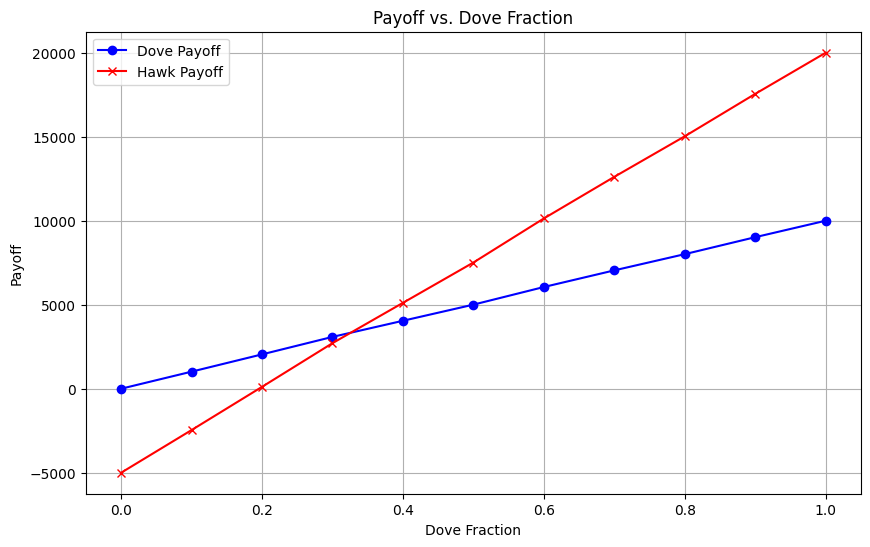

In [4]:
# List of dove fractions
dove_fractions = [i * 0.1 for i in range(11)]

# Plotting both dove and hawk payoffs
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.plot(dove_fractions, dove_list, label='Dove Payoff', color='blue', marker='o')  # Plot dove payoffs
plt.plot(dove_fractions, hawk_list, label='Hawk Payoff', color='red', marker='x')  # Plot hawk payoffs

# Adding titles and labels
plt.title('Payoff vs. Dove Fraction')
plt.xlabel('Dove Fraction')
plt.ylabel('Payoff')
plt.grid(True)  # Enable grid for easier readability

# Adding a legend to distinguish between plots
plt.legend()

# Display the plot
plt.show()

## Conclusion

Being a `hawk` in a `dove`-world is the most desirable outcome in terms of payoffs. Being a `dove` in a `hawk`-world, albeit not as rewarding as in the opposite case, is also the most desirable outcome - you'll get nothing, but then again you won't have anything to lose.

In environments where you'll only meet people ***once*** like, for example, at a course in another faculty where they serve cookies - take them all; especially if its a humanities course where their minds haven't been polluted by Economic Theory. If you meet them again, they probably won't put the cookies where you can reach them.